# K Nearest Neighbor (KNN)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load dữ liệu
dataset = pd.read_csv('diabetes.csv')

## 1) Khám phá dữ liệu

In [3]:
# get how many instances (rows) and how many attributes (columns)
dataset.shape

(768, 9)

In [4]:
#show thông tin thống kê cơ bản: max, min, mean của các columns trong dataset
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# describe the dataset
dataset.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Somes of the columns should NOT have zero values, for example:

['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [6]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Let's replace null values with mean or median

In [7]:
dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].fillna(dataset['SkinThickness'].median())
dataset['Insulin'] = dataset['Insulin'].fillna(dataset['Insulin'].median())
dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].median())

In [8]:
#Show vài dòng đầu tiên của dữ liệu
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
#Show vài dòng cuối của dữ liệu
dataset.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1
767,1,93.0,70.0,31.0,125.0,30.4,0.315,23,0


In [10]:
# T number of instances (rows) that belong to each class. 
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

### this dataset looks pretty imba

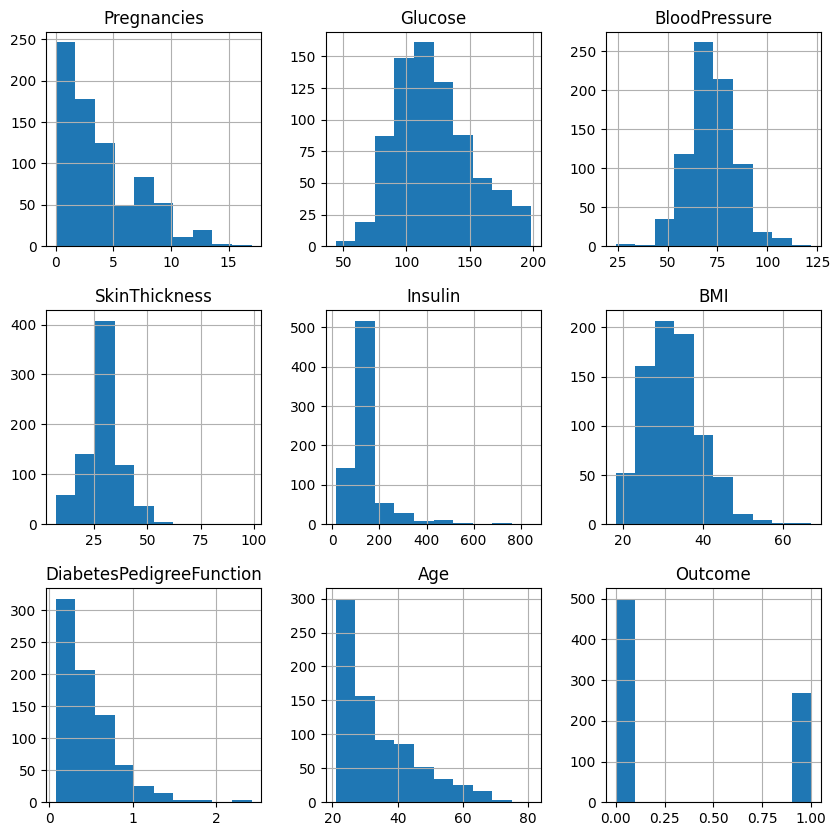

In [11]:
p = dataset.hist(figsize = (10,10))

### Scale dataset

Vì đơn vị của mỗi feature khác nhau

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataset.drop('Outcome',axis=1))
scaled_features = scaler.transform(dataset.drop('Outcome',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=dataset.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


###  Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
scaled_dataset = pd.concat([df_feat,dataset['Outcome']],axis=1)

#### Pairplot

<Figure size 640x480 with 0 Axes>

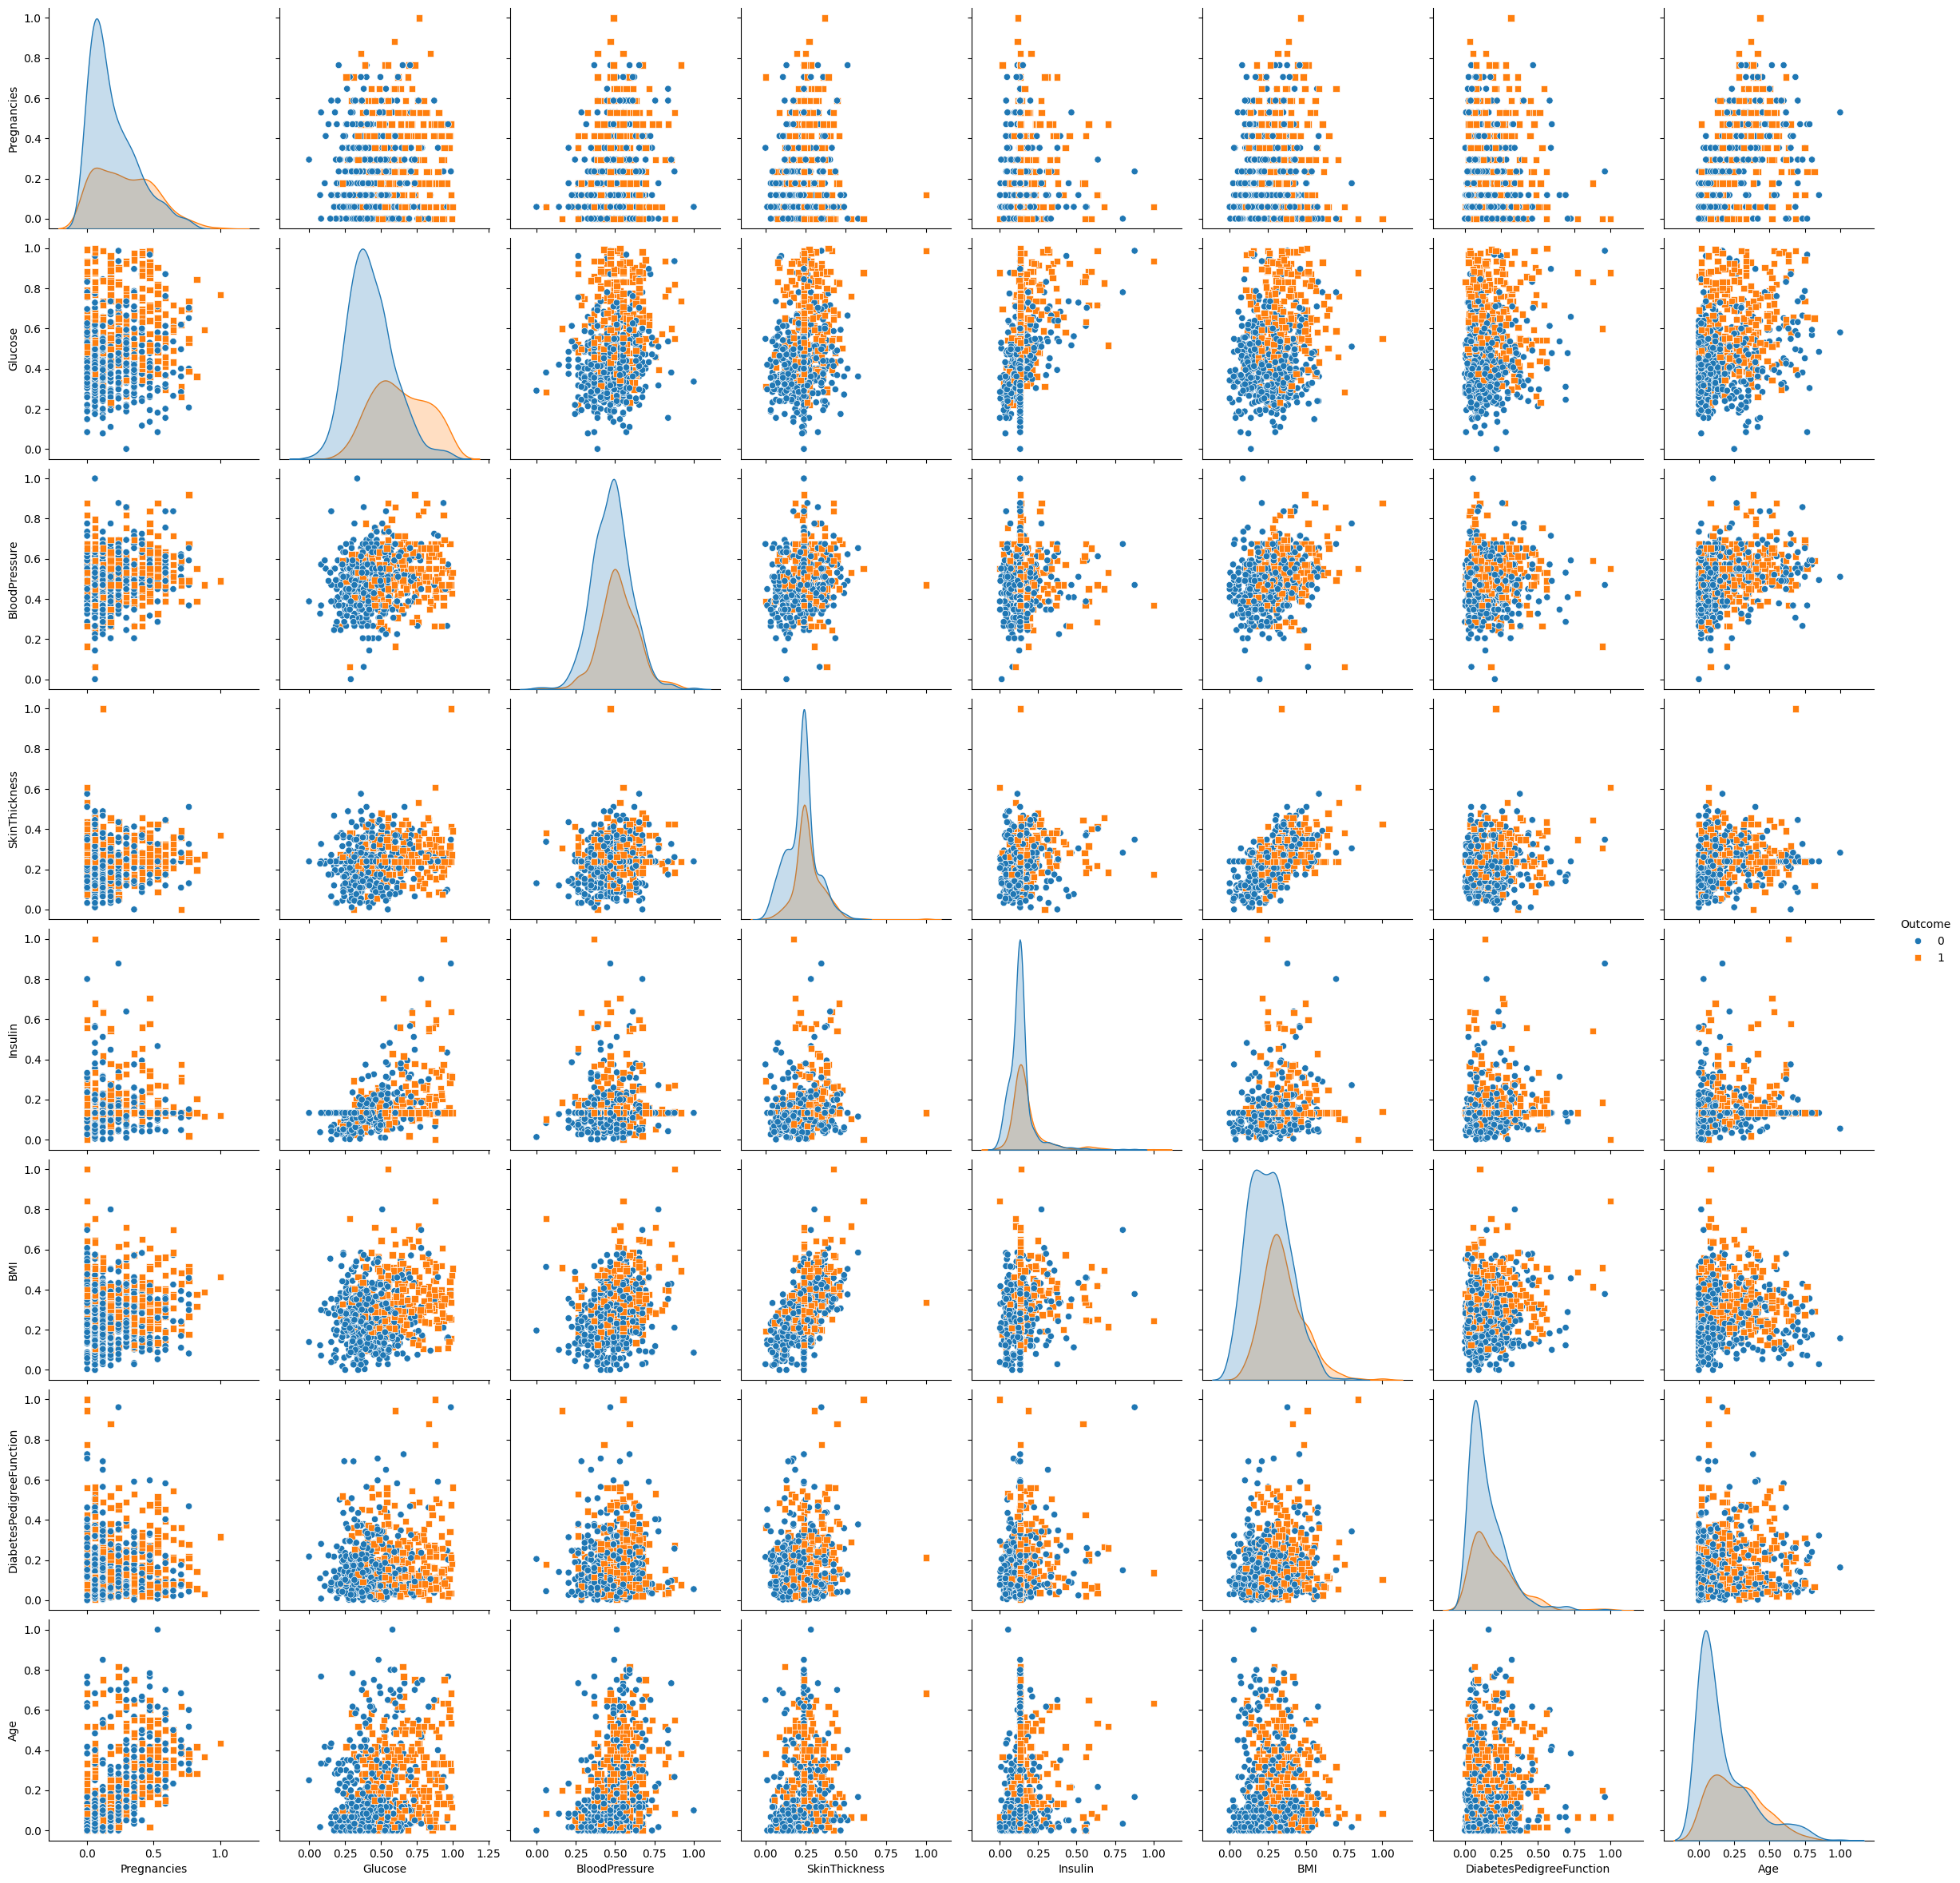

In [15]:
plt.figure()
sns.pairplot(scaled_dataset, hue = "Outcome", height=3, markers=["o", "s"])
plt.show()

####  Boxplots

In [16]:
# plt.figure()
# dataset.boxplot(by="Outcome", figsize=(30, 20))
# plt.show()

## 2) Data preprocessing

#### Xác định  ``features`` và ``labels``

In [17]:
feature_columns = list(scaled_dataset)[0:-1] # Excluding Outcome column
X = scaled_dataset[feature_columns].values
y = scaled_dataset['Outcome'].values


#### Encoding (Lable Encoding)

Outcome là 0 và 1, khỏi encode

0 là ko bịnh
1 là bị bịnh

####  Spliting dataset into training set and test set

- training set: dùng để xây dựng classifier
- test set: sẽ được sử dụng để evaluate liệu  classifier  tốt hay không

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
X_train.shape #số rows dùng để train(80%)

(614, 8)

In [20]:
y_train.shape

(614,)

In [21]:
X_test.shape #số rows dùng để test (20%)

(154, 8)

In [22]:
y_test.shape

(154,)

## 3) Using KNN for classification

####  Xây dựng model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

#### Thay đổi ``k`` để tìm ``k`` phù hợp

In [24]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

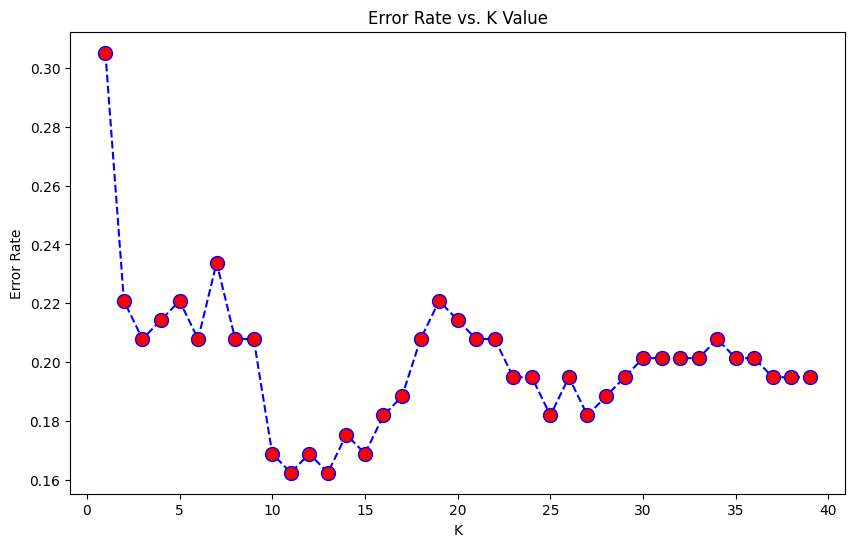

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Từ biểu đồ trên, ta chọn ``k = 11`` để xây dựng model, do error rate thấp nhất với K nhỏ nhất

In [26]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[81 26]
 [21 26]]


              precision    recall  f1-score   support

           0       0.79      0.76      0.78       107
           1       0.50      0.55      0.53        47

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.70      0.69      0.70       154



In [27]:
# NOW WITH K=11
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=11


[[96 11]
 [14 33]]


              precision    recall  f1-score   support

           0       0.87      0.90      0.88       107
           1       0.75      0.70      0.73        47

    accuracy                           0.84       154
   macro avg       0.81      0.80      0.81       154
weighted avg       0.84      0.84      0.84       154

